In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")

In [186]:
#Load the data and encoding types to load the data
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\customer_segmentation_using_RFM.csv',encoding="ISO-8859-1")
#df = pd.read_csv('C:\\Users\kmmoh\Downloads\',encoding = "cp1252")


In [39]:
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [187]:
# Drop the columns which do not contribute to the customer segementation analysis
df.drop(columns=['StockCode', 'Description'],axis=1, inplace=True)

In [11]:
df.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [188]:
#cancelled orders are not taken here
df=df[df['Quantity'] >0]


In [189]:
# drop the columns where customer id is Null 
#or the group the customer with -999
df.dropna(subset=['CustomerID'],how='all',inplace=True)
#df['CustomerID'].fillna(-999,inplace=True)

In [49]:
df.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [190]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [59]:
df.shape

(397924, 6)

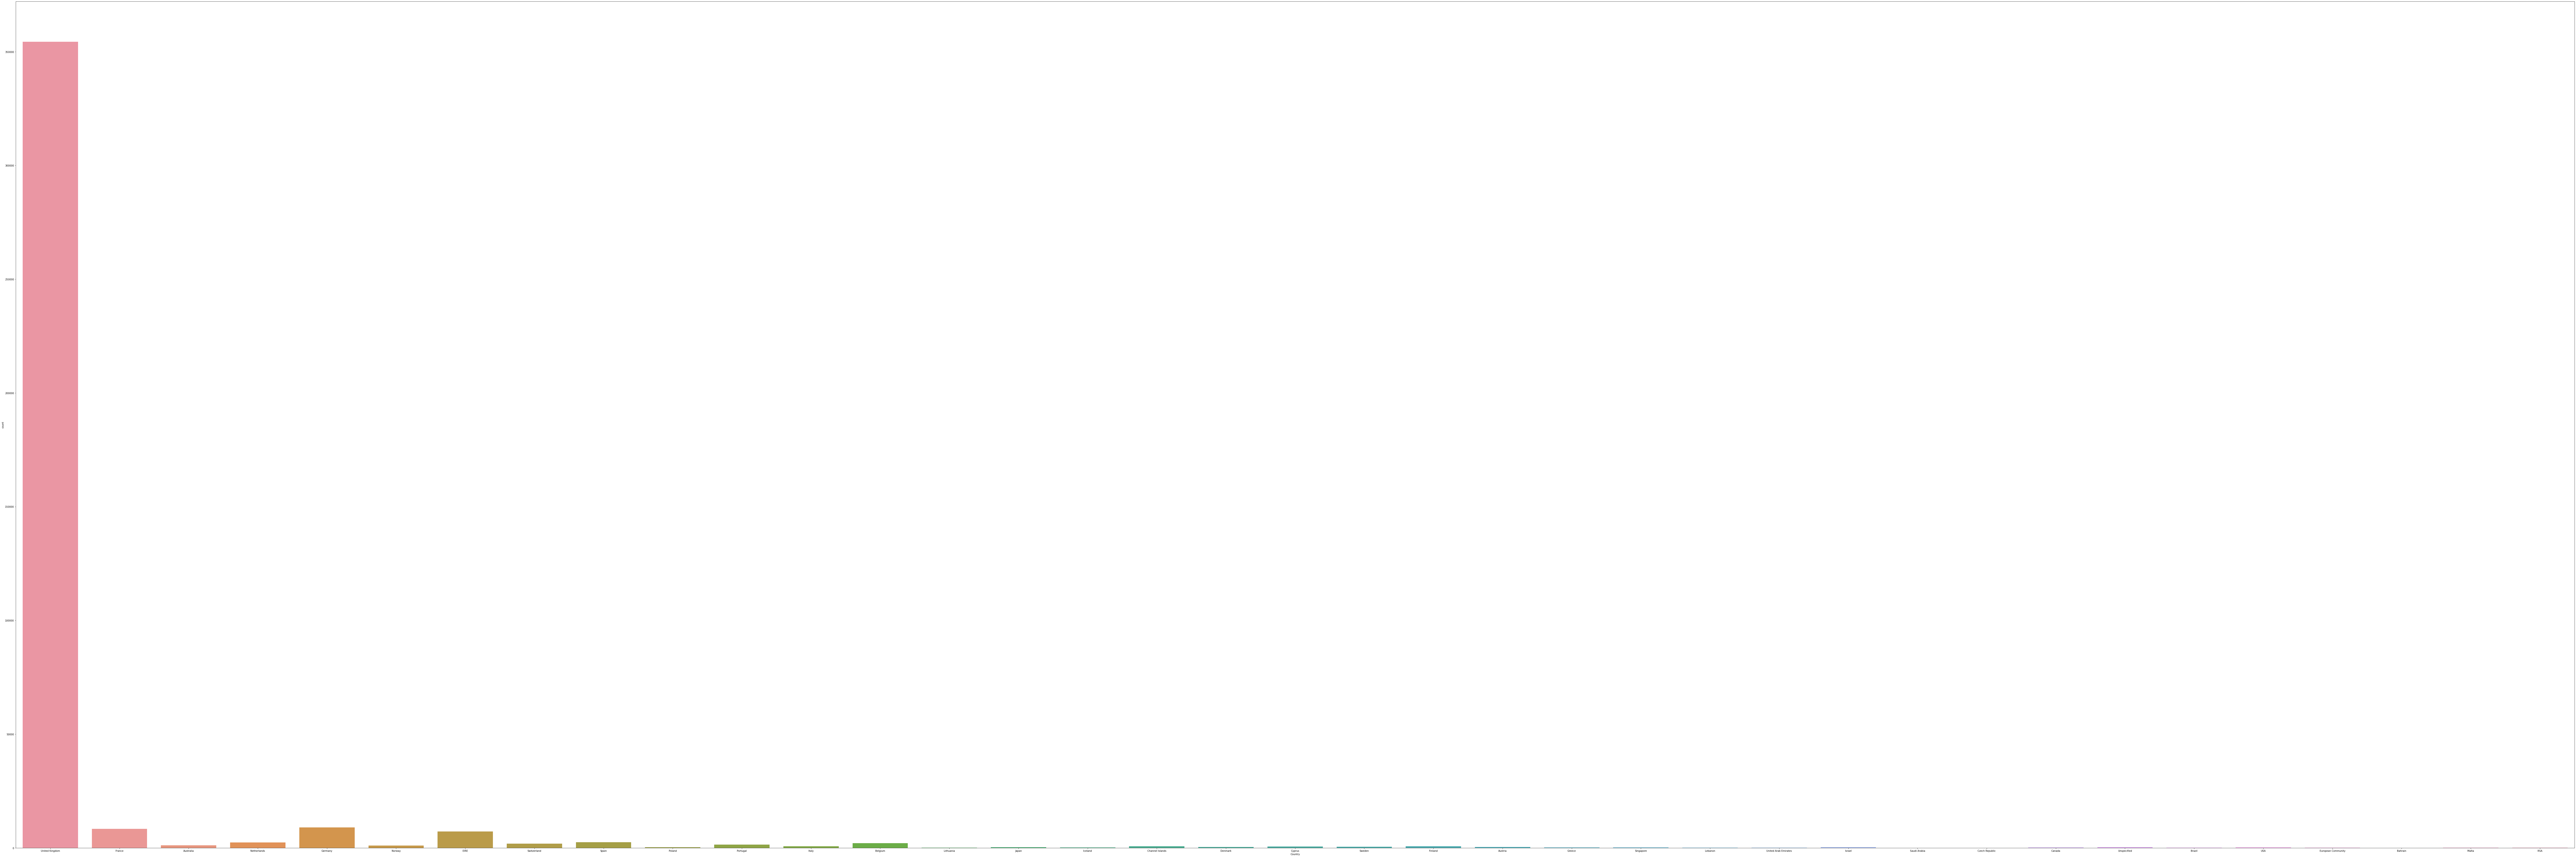

In [191]:
# change the figure size plt.figure(figsize=(200,50)) to see which country has more customers
plt.figure(figsize=(150,50))
sns.countplot('Country',data=df)
plt.tight_layout()


In [180]:
#Analysing only UK customers
df=df[df['Country']=='United Kingdom'] 

In [181]:
df.shape

(486286, 6)

In [192]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [193]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [195]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

# It is about a data in year , just 8 days more  date Maximum. But this is one year data

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various  clusters to identify customers who are more likely to respond to promotions and also  recommend for future personalization services.

RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent.

In [94]:
df.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [196]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [197]:
#create a new column called date which contains the date of invoice only
df['date'] = pd.DatetimeIndex(df['InvoiceDate']).date

In [198]:
df.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [199]:
#group by customers and check last date of purshace
recencydf = df.groupby(by='CustomerID', as_index=False)['date'].max()
recencydf.columns = ['CustomerID','LastPurshaceDate']
recencydf.head()


,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [200]:
#calculate recency
recencydf['Recency'] = recencydf['LastPurshaceDate'].apply(lambda x: (now - x).days)


In [201]:
recencydf.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [202]:
recencydf.drop(columns=['LastPurshaceDate'],axis=1,inplace=True)

In [203]:
recencydf

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4334,18280.0,277
4335,18281.0,180
4336,18282.0,7
4337,18283.0,3


In [204]:
# check to see if any nulls in Invoice
df['InvoiceNo'].isna().sum()

0

In [205]:
#how many invoices are registered by the same customer.
frequencydf =df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequencydf.columns = ['CustomerID','Frequency']
frequencydf.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [206]:
#How much money did the customer spent over time?
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [207]:
monetarydf = df.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetarydf.columns = ['CustomerID','Monetary']
monetarydf.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
sns.pairplot(recencydf,x_vars='Recency', y_vars='CustomerID')


In [ ]:
sns.pairplot(frequencydf, x_vars='Frequency', y_vars='CustomerID')


In [ ]:
sns.pairplot(monetarydf,x_vars='Monetary', y_vars='CustomerID')